### assignment-6  team member:Yuchuan Lin (001302756), Zixiao Wang

In [50]:
import pandas as pd
csv_file = "energydata_complete.csv"
csv_data = pd.read_csv(csv_file, low_memory = False)
csv_df = pd.DataFrame(csv_data)
data = csv_df
data.head(10)
data.head()
print()

In [51]:
data.head()

T1       RH_1    T2       RH_2     T3       RH_3         T4       RH_4  \
0  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000  45.566667   
1  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000  45.992500   
2  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667  45.890000   
3  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000  45.723333   
4  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000  45.530000   

          T5   RH_5        T6       RH_6  
0  17.166667  55.20  7.026667  84.256667  
1  17.166667  55.20  6.833333  84.063333  
2  17.166667  55.09  6.560000  83.156667  
3  17.166667  55.09  6.433333  83.423333  
4  17.200000  55.09  6.366667  84.893333

In [52]:
import numpy
from matplotlib import pyplot
%matplotlib inline
#pyplot.style.use('ggplot')
import pandas as pd
import seaborn as sns

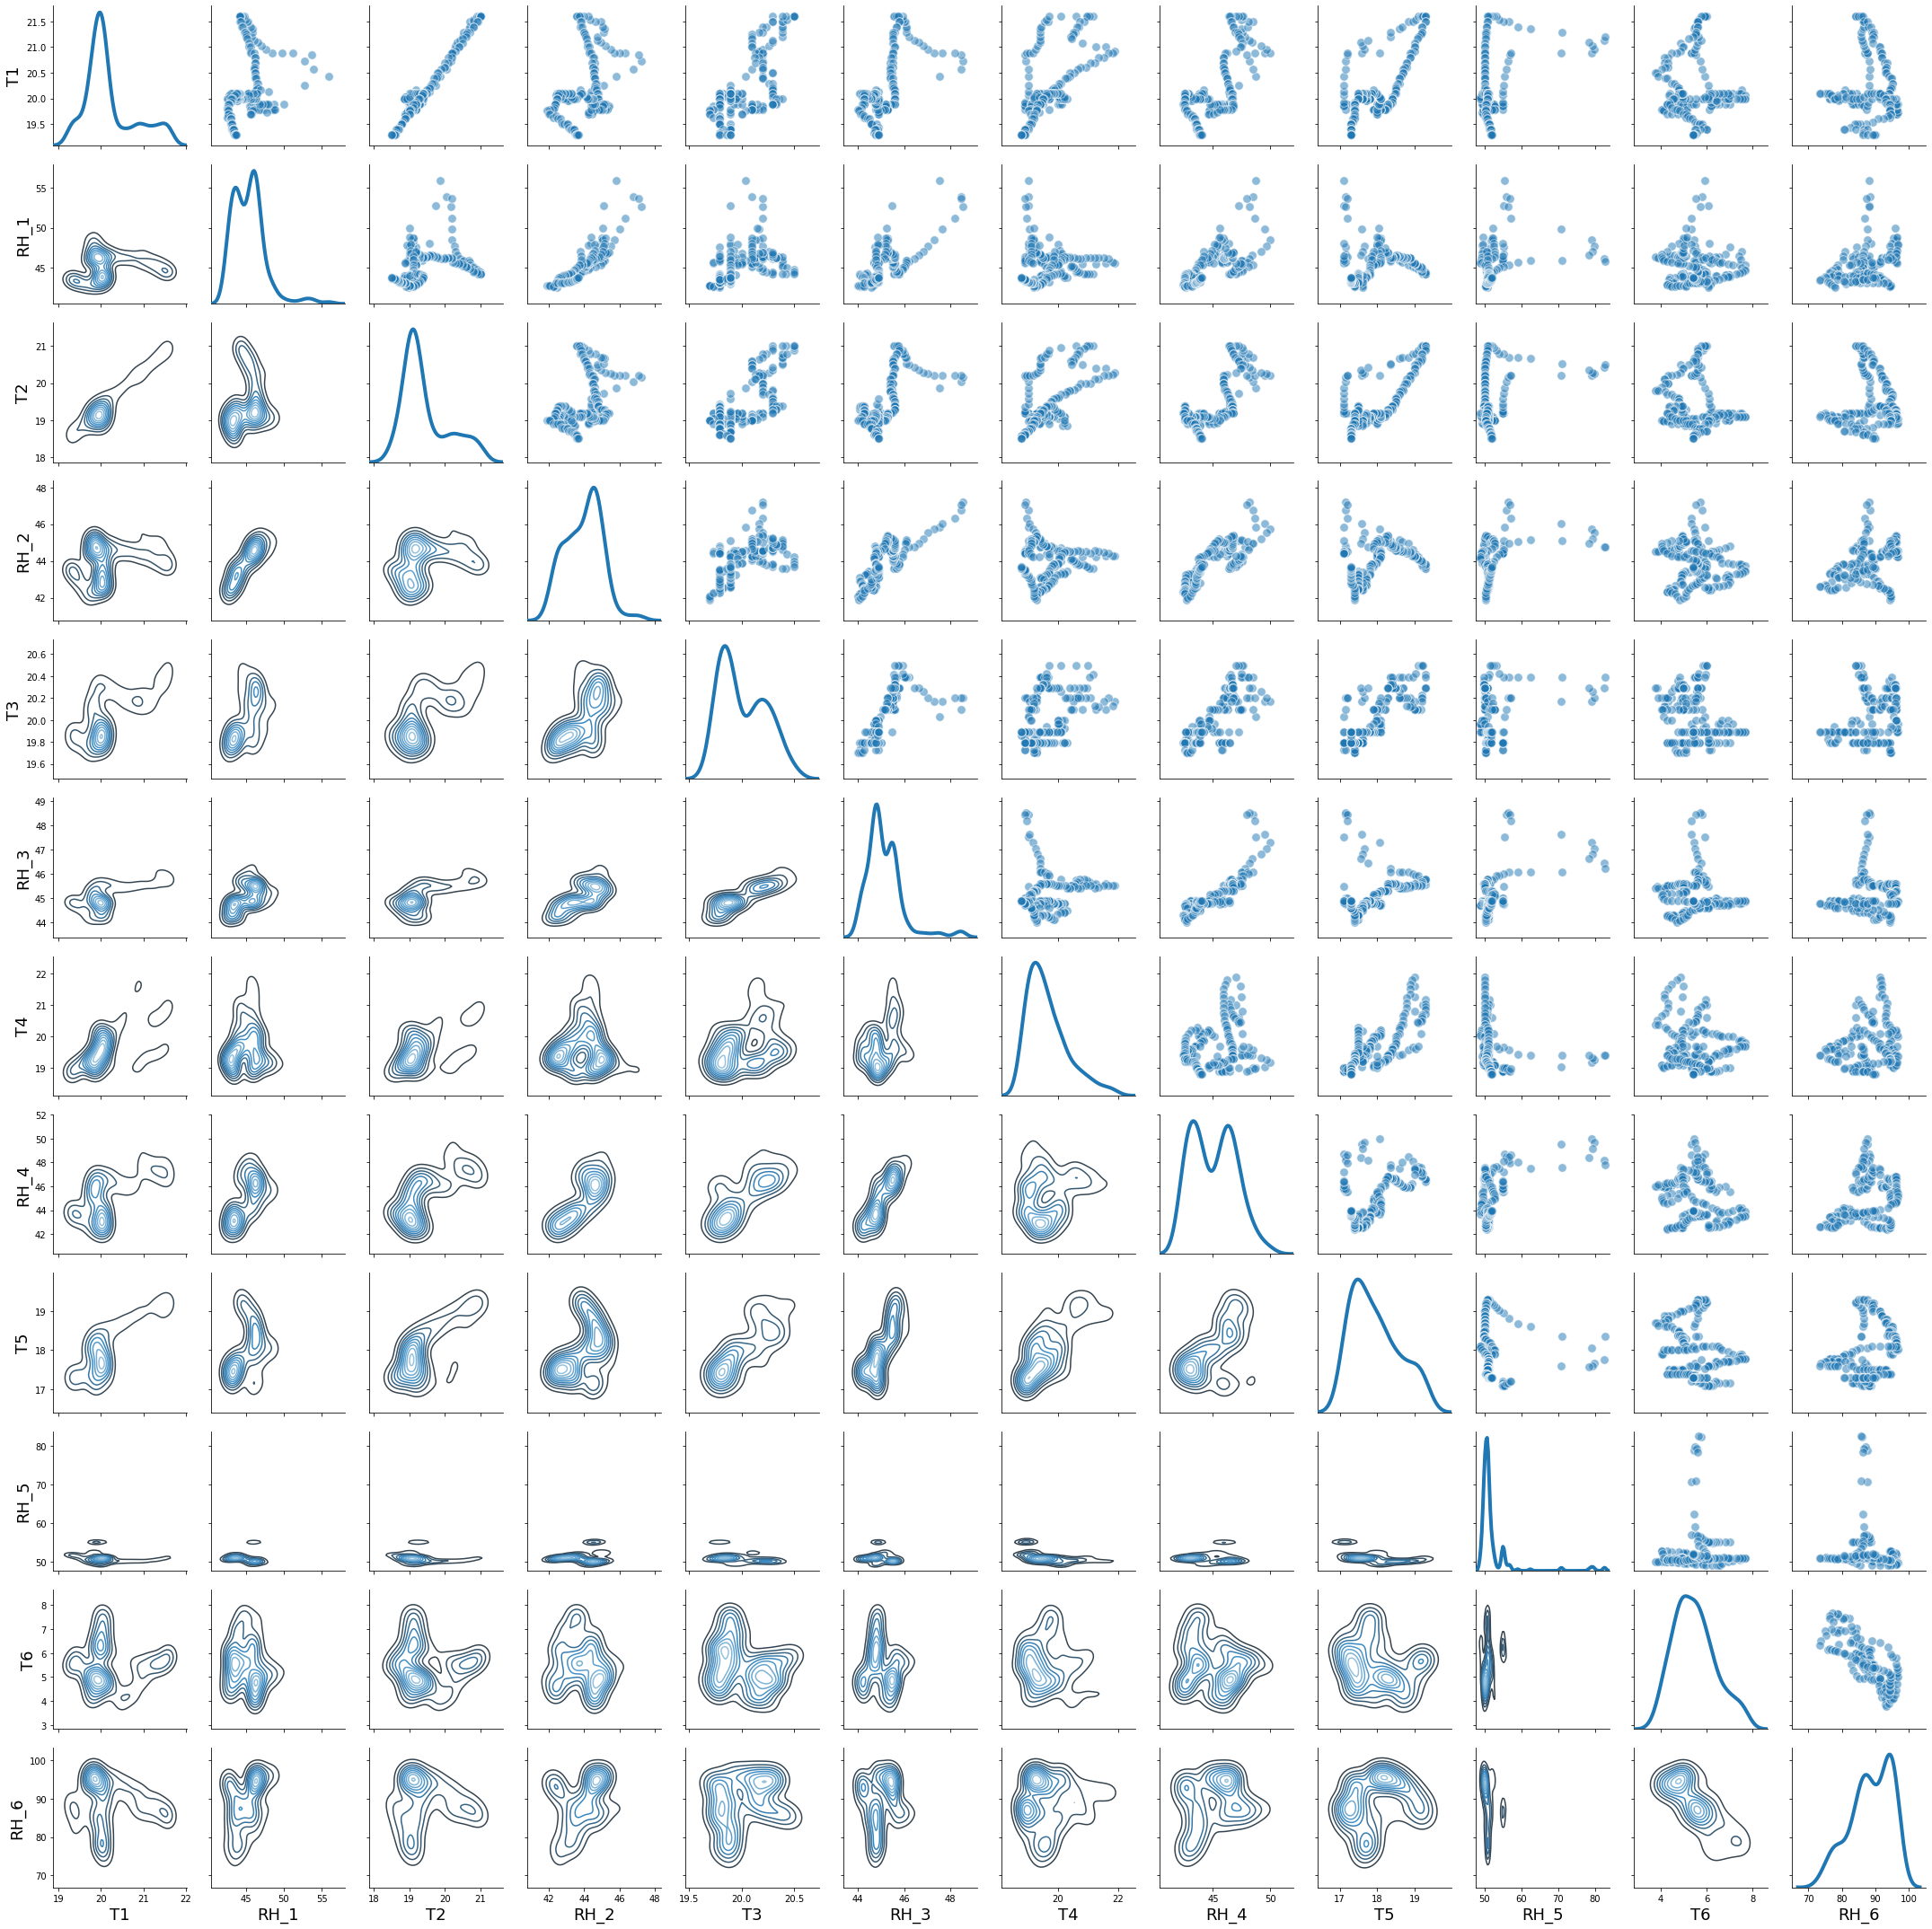

In [53]:
pyplot.rcParams["axes.labelsize"] = 18
g = sns.PairGrid(data, diag_sharey=False)
axes = g.axes
g.map_upper(pyplot.scatter, linewidths=1, 
            edgecolor="w", s=90, alpha=0.5)
g.map_diag(sns.kdeplot, lw = 4, legend=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
pyplot.show()

In [192]:
### rh3 
X = data[list(data.columns)[5:6]]
y = data[list(data.columns)[7:8]]


In [55]:
X.head()

RH_3
0  44.730000
1  44.790000
2  44.933333
3  45.000000
4  45.000000

In [56]:
y.head()

RH_4
0  45.566667
1  45.992500
2  45.890000
3  45.723333
4  45.530000

In [57]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X.values, y.values, test_size = 0.25,
                                                                           random_state = 42)

In [58]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 10, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels)

/Users/riverlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [59]:
import numpy as np

# Use the forest's predict method on the test data
predictions = rf.predict(X)


In [60]:
predictions

array([44.85604445, 44.37076269, 45.66866667, 45.54944444, 45.54944444,
       45.66866667, 44.4352533 , 44.4352533 , 44.37076269, 44.45298254,
       44.4352533 , 44.79028333, 44.4352533 , 47.03849047, 48.96875   ,
       48.18333333, 48.18333333, 48.18333333, 48.18333333, 48.96875   ,
       49.59416667, 49.46275   , 48.66      , 48.512     , 48.23866667,
       47.76444444, 47.71388889, 47.71388889, 47.71388889, 47.71388889,
       47.57164445, 47.4607    , 47.4607    , 46.93881548, 47.14529167,
       46.79854445, 47.01366667, 46.70333333, 47.14529167, 46.93881548,
       46.93881548, 46.75209091, 46.70333333, 46.79854445, 46.42398413,
       46.42398413, 46.42398413, 46.42398413, 47.25917143, 46.79854445,
       46.79854445, 47.25917143, 46.42398413, 46.42398413, 46.42398413,
       46.42728968, 46.05813651, 46.42398413, 46.42398413, 46.05813651,
       46.05813651, 46.446     , 46.05813651, 46.05813651, 46.05813651,
       46.42398413, 46.42398413, 46.42398413, 46.42398413, 46.42

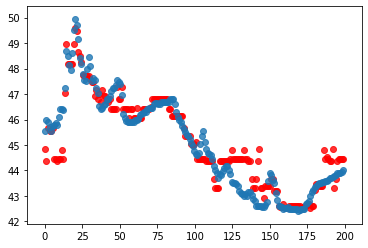

In [135]:
z = np.linspace(0,199,199)

sns.regplot(z,predictions,fit_reg=False,color='r')
sns.regplot(z,y,fit_reg=False)

### oh! the result of RF-1 is awesome!

lets move to the next:

In [136]:
### rh3 
X1 = data[list(data.columns)[0:7]+list(data.columns)[8:12]]
y1 = data[list(data.columns)[7:8]]


In [137]:
X1.head()

T1       RH_1    T2       RH_2     T3       RH_3         T4         T5  \
0  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000  17.166667   
1  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000  17.166667   
2  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667  17.166667   
3  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000  17.166667   
4  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000  17.200000   

    RH_5        T6       RH_6  
0  55.20  7.026667  84.256667  
1  55.20  6.833333  84.063333  
2  55.09  6.560000  83.156667  
3  55.09  6.433333  83.423333  
4  55.09  6.366667  84.893333

In [64]:
y1.head()

RH_4
0  45.566667
1  45.992500
2  45.890000
3  45.723333
4  45.530000

In [77]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X1.values, y1.values, test_size = 0.25,
                                                                           random_state = 42)

In [78]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf1 = RandomForestRegressor(n_estimators= 10, random_state=42)

# Train the model on training data
rf1.fit(train_features, train_labels)

/Users/riverlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [79]:
import numpy as np

# Use the forest's predict method on the test data
predictions1 = rf1.predict(X1)


In [80]:
predictions1

array([45.589     , 45.84083333, 45.75083333, 45.67758333, 45.58966667,
       45.79933333, 45.86133333, 45.84133333, 45.74866667, 46.05333333,
       46.43      , 46.43      , 46.39      , 46.978     , 48.523     ,
       48.256     , 48.27666667, 48.28141667, 48.68125   , 48.77158333,
       49.49383333, 49.31541667, 48.887     , 48.39466667, 48.758     ,
       47.96566667, 47.61      , 48.03883333, 47.84533333, 47.80866666,
       47.577     , 47.49766667, 47.57433334, 47.29633333, 47.06608333,
       46.90241667, 46.21275   , 46.17475   , 46.69808333, 46.65591667,
       46.59916667, 46.84833333, 46.89166667, 46.99766667, 47.00933333,
       47.19533333, 47.179     , 47.25      , 47.482     , 47.26833334,
       47.235     , 46.86633334, 46.26733334, 46.064     , 45.946     ,
       45.92666666, 45.926     , 45.916     , 45.916     , 45.929     ,
       45.965     , 45.973     , 46.03433333, 46.141     , 46.189     ,
       46.159     , 46.18933333, 46.21966667, 46.25      , 46.33

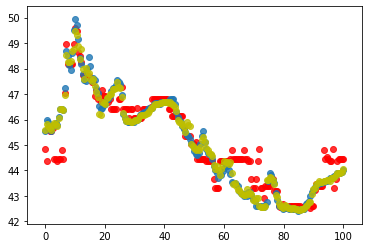

In [81]:
z = np.linspace(0,100,199)

sns.regplot(z,predictions,fit_reg=False,color='r')
sns.regplot(z,y,fit_reg=False)
sns.regplot(z,predictions1,fit_reg=False,color='y')

In [138]:
from sklearn import gaussian_process
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)

In [204]:
y = data[list(data.columns)[7:8]]

X = z.reshape(-1, 1)
X.shape
y = y.values
y=y.flatten()

# n = np.random.random(100,1) 
y=y+0.5*np.random.randn(199) 
# np.random.randint(-2,2)

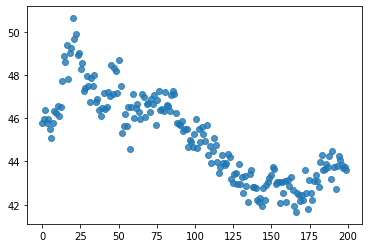

In [205]:
sns.regplot(z, y, fit_reg=False)

In [206]:
gp = gaussian_process.GaussianProcessRegressor(kernel=kernel)
# y=y.values

gp.fit(X, y)
type(y)

numpy.ndarray

In [207]:
x_pred = np.linspace(0, 199).reshape(-1,1)
y_pred, sigma = gp.predict(x_pred, return_std=True)
print(x_pred.shape)
np.concatenate([x_pred, x_pred[::-1]]).shape
np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]).shape

(50, 1)


(100,)

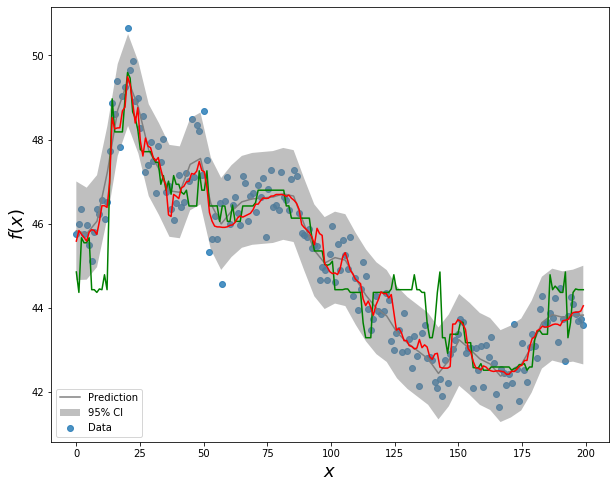

In [208]:
import matplotlib.pylab as plt
plt.figure(figsize=(10,8))
sns.regplot(z, y, fit_reg=False, label='Data')
plt.plot(x_pred, y_pred, color='grey', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 2*sigma,
                        (y_pred + 2*sigma)[::-1]]),
         alpha=.5, fc='grey', ec='None', label='95% CI')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
# plt.xlim(-6, 6)
# plt.ylim(-3, 3)
plt.legend(loc='lower left');
plt.plot(z,predictions,color='g')
plt.plot(z,predictions1,color='r')